In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [5]:
df.sample()['clean_comment'].values

array(['how this futurology are they using some special tech for delivering this healthcare '],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [8]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [9]:
df.dropna(inplace=True)

In [10]:
# 1 remove the null value
df.isna().sum()

clean_comment    0
category         0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(350)

In [12]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [13]:
# 2 .> remove the duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()


np.int64(0)

In [15]:
#3.> any empty rows present remove them
df[df['clean_comment'].str.strip()=='']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [16]:
# remove the above rows
df = df[~(df['clean_comment'].str.strip()=='')]

In [17]:
#4.> convert the clean comment to lower case...

df['clean_comment'] = df['clean_comment'].str.lower()

# verify
df.head()

# in order to avoid the python to copy the dataframe and make the changes in the original dataframe

# df.loc[:, 'clean_comment'] = df['clean_comment'].str.lower()
# df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [18]:
# print(id(df))

#5.> find the space(trailing & leading spaces) from the front and end of the comment

df[df['clean_comment'].apply(lambda x:x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [19]:
# so 32k rows have trailing or leading whitespace so we have to remove them

df['clean_comment'] = df['clean_comment'].str.strip()

# for better approach use it

# df.iloc[:, df.columns.get_loc('clean_comment')] = df['clean_comment'].str.strip()

# verify after removal

df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [20]:
# 6.> finding url and removing them

# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comment containing the urls
comments_with_urls.head()

,clean_comment,category


In [21]:
# 7.> Identify comments with new line and remove them

comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# display the comments with new line
comments_with_newline

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [22]:
# remove new line
df['clean_comment'] = df['clean_comment'].str.replace('\n',' ',regex=True)

# more efficient way
# df.iloc[:, df.columns.get_loc('clean_comment')] = df['clean_comment'].str.replace('\n',' ',regex=True)


# verify it
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining



,clean_comment,category


<Axes: xlabel='category', ylabel='count'>

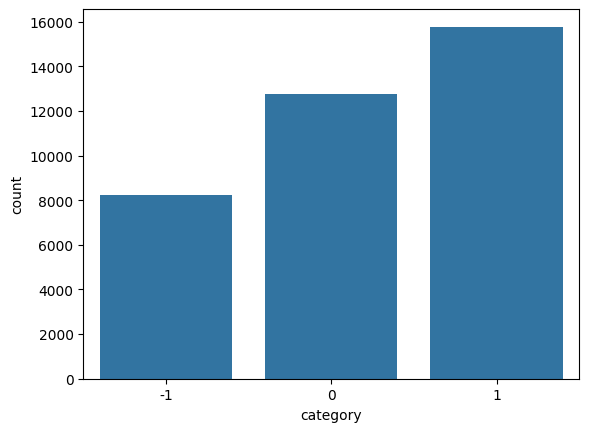

In [24]:
# EDA

import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x='category')

In [25]:
# 1.> frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

# imbalance is present

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [26]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)

,clean_comment,category,word_count
2671,what long silence hear about rape india all th...,-1,14
31917,what clickbait post the porn ban was done the ...,0,23
13340,don get into these slugfests barmy just ignore,0,8
25277,true mitr this modi remembers mitrons birthday...,1,9
6205,thats exactly why try not argue with dickheads...,1,90


In [27]:
df['word_count'].describe()
# mean and median have significant diff... which indiactes outliers

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

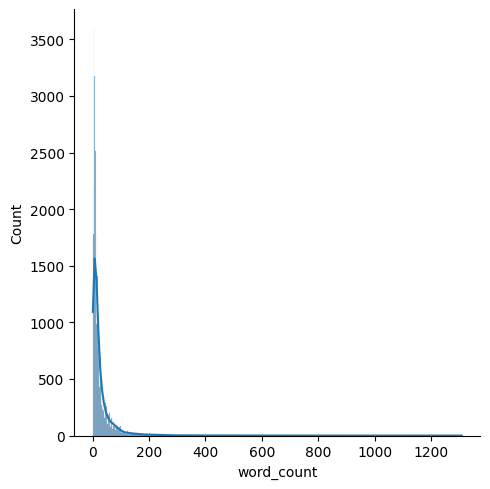

In [28]:
sns.displot(df['word_count'], kde = True)

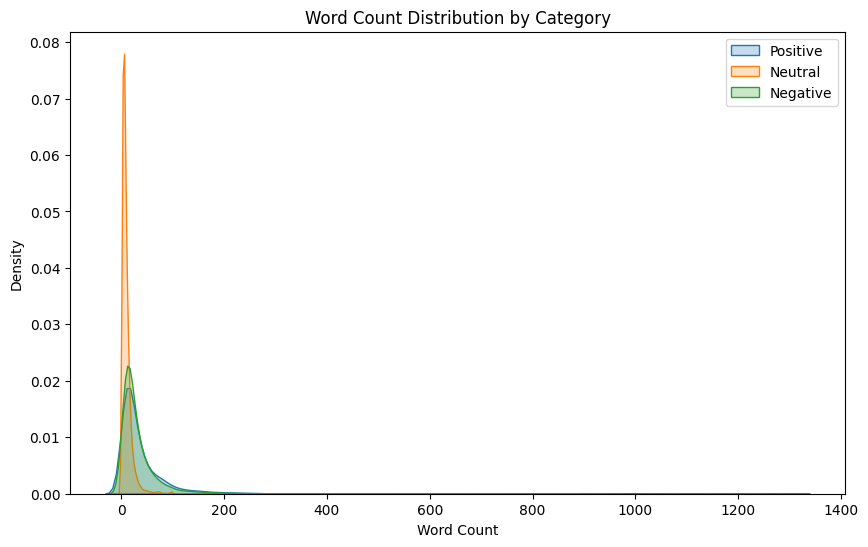

In [29]:
# same plots with diff categories

plt.figure(figsize=(10,6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# add legend
plt.legend()

# show the plot
plt.show()


#### category(+ve) 1: have a wider spread in word count, indicating that longer comments are more common in +ve sentiments.
#### category (neutral) 0: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to +ve or -ve ones.
#### category (-ve)-1: have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

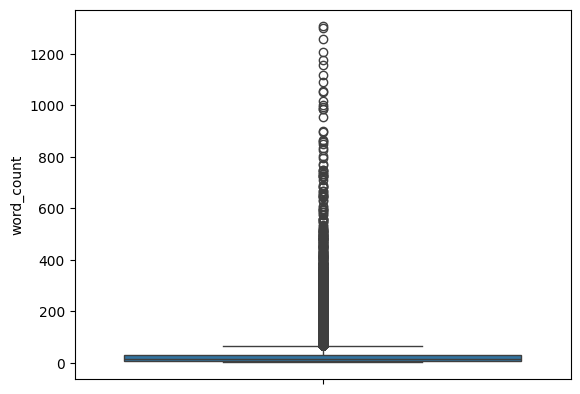

In [30]:
# outliers

sns.boxplot(df['word_count'])

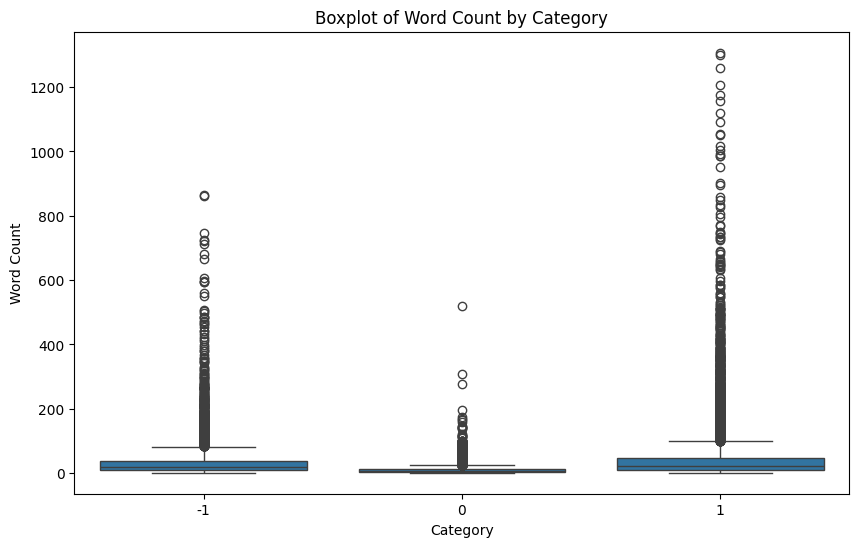

In [31]:
# category wise word count

plt.figure(figsize = (10,6))
sns.boxplot(data=df,x='category',y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

In [32]:
# Positive comments (category 1): The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.
# Neutral comments (category 0): The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.
# Negative comments (category -1): The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

<Axes: xlabel='category', ylabel='word_count'>

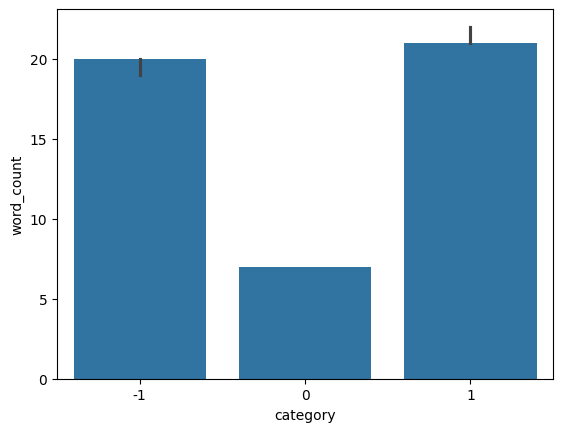

In [33]:
# median word counts among sentiments

sns.barplot(df, x='category',y='word_count',estimator='median')

Text(0.5, 1.0, 'scatter plot of word count by category')

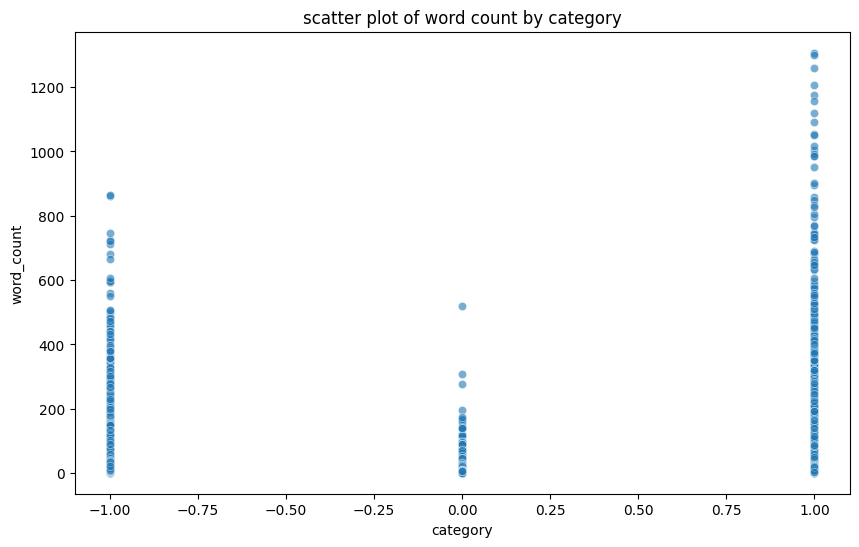

In [34]:
# scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='category',y='word_count',alpha=0.6)
plt.title('scatter plot of word count by category')


In [36]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
#df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91734\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
20787,interested know what section was used arrest him,1,8,3
31551,can just well say the best was charan singh bu...,1,52,25
29781,related news indian army also found cure for a...,1,48,13
33022,time boycott nicki minaj boys,0,5,0
16970,way lads proud the guy who tweeted and everyon...,1,11,4


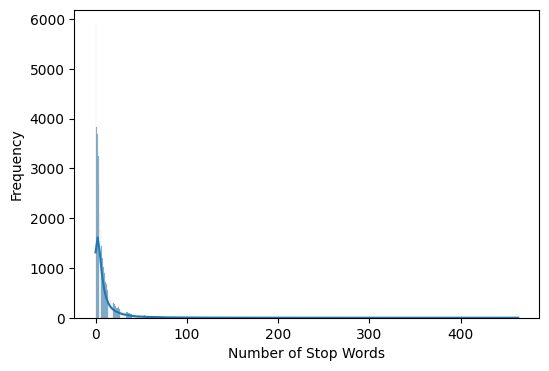

In [38]:
# distribution plot for stopwords

plt.figure(figsize=(6,4))
sns.histplot(df['num_stop_words'],kde = True)
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

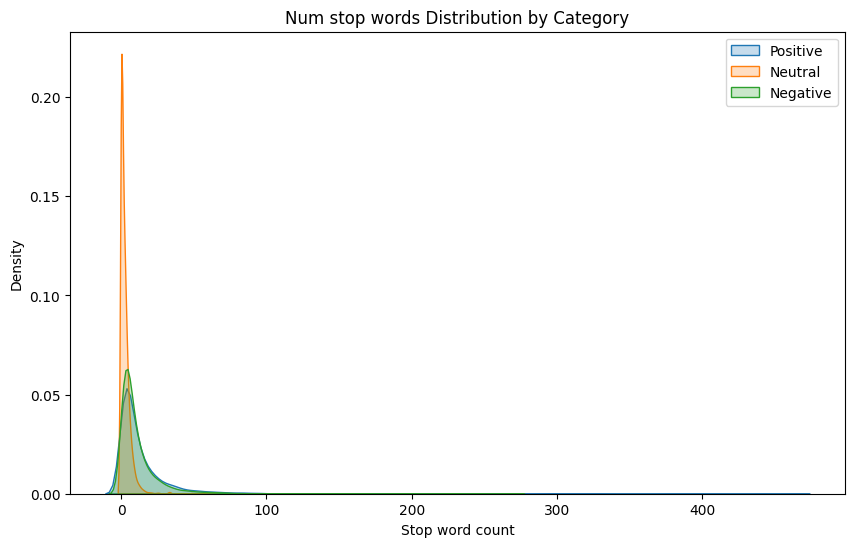

In [39]:
# for every different category doing it

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

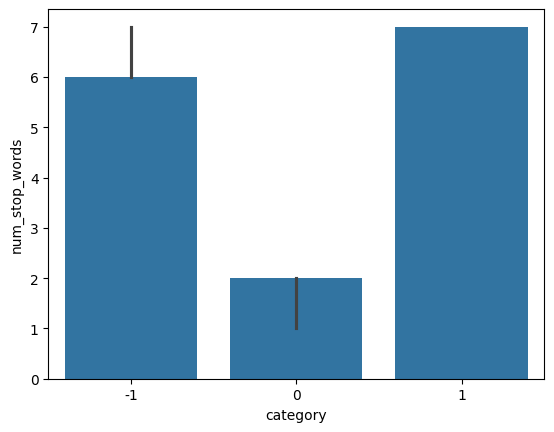

In [40]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

C:\Users\91734\AppData\Local\Temp\ipykernel_19920\3178560528.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_25_df, x='count' , y = 'stop_word' ,palette='viridis')


<Axes: xlabel='count', ylabel='stop_word'>

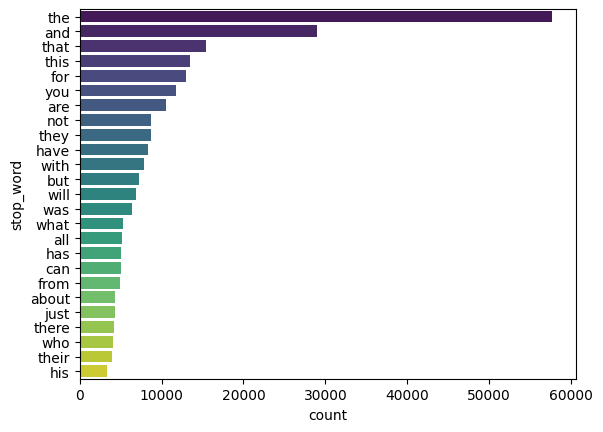

In [41]:
# presenting the most common stopwords

from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# count the most common stopwords

most_common_stop_words = Counter(all_stop_words).most_common(25)

# convert the most common stop words into dataframe
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word','count'])

# Create the barplot for the top 25 most common stop words

sns.barplot(data = top_25_df, x='count' , y = 'stop_word' ,palette='viridis')

In [42]:
# num characters

df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [43]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [44]:
# which characters have came max in the data

from collections import Counter

# combine all the comment in one large string

all_text = " ".join(df['clean_comment'])

# count the frequency for each character
char_frequency = Counter(all_text)

# convert into dataframe
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character','frequency']).sort_values(by='frequency',ascending=False)

In [45]:
char_frequency_df.tail(50)

,character,frequency
1336,回,1
1337,毫,1
1322,足,1
1323,够,1
1324,假,1
1325,才,1
1326,叫,1
1327,醒,1
1328,妖,1
1329,婆,1


In [46]:
# some of the special characters which are not english they are differnet language chars

# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
4813,when modi used passionately criticize muslims ...,-1,35,13,230,0
27473,probably muslims,0,2,0,16,0
9289,lots box beds gujarat are being opened right now,1,9,3,48,0
12847,anyone from digital and advertising background...,1,16,4,100,0
36504,someone accuses them child abuse and poverty,0,7,2,44,0


In [47]:
df['num_punctuation_chars'].describe()

# we have the feel of both the +ve and -ve since all the puctuation marks are removed some of them could be imp like ! marks to derive the sentiments

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# extract top 25 bigrams

def get_top_ngrams(corpus,n=None):

  vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

# get top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'],25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# plot
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# extract top 25 bigrams

def get_top_ngrams(corpus,n=None):

  vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

# get top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'],25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# plot
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')

In [ ]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [ ]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

In [ ]:
from nltk.corpus import stopwords

# define stop words but keep the special one for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not','but', 'however', 'no', 'yet'}

# remove stop words and keep the essential one

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words ]))

In [ ]:
df.head()

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lematizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lematizer.lemmatize(word) for word in x.split()]))

df.head()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_clound(text):
  word_cloud = WordCloud(height=800,width=600,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(word_cloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

plot_word_clound(df['clean_comment'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] ==0]['clean_comment'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

In [ ]:
def plot_top_n_word(df ,n = 25):
  """ Plot the top N most frequent word in the dataset flatten all words in the content column"""
  word = ' '.join(df['clean_comment']).split()

  # get the top counter
  counter = Counter(word)
  most_common_word = counter.most_common(n)
  word , counts = zip(*most_common_word)

  # plot the top n words
  sns.barplot(x=list(counts), y = list(word))
  plt.title(f'top {n} most frequent words')
  plt.xlabel('Frequency')
  plt.ylabel('')
  plt.show()

plot_top_n_word(df, n=50)

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)